In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/distan_lat43.302lon-8.377p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/LECOY2018Y2022.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M                  83.07%
-RA                 4.35%
BCFG                2.48%
FG                  1.87%
BR                  1.35%
RA                  1.30%
-DZ                 0.75%
-RA BR              0.57%
VCFG                0.55%
SHRA                0.48%
-SHRA               0.33%
BR BCFG             0.33%
PRFG                0.28%
RA BR               0.24%
DZ                  0.19%
-DZ BR              0.13%
-RA BCFG            0.13%
VCSH                0.12%
-RADZ               0.11%
+RA                 0.09%
FZFG                0.08%
+SHRA               0.07%
-DZ BCFG            0.06%
VCTS                0.06%
BCFG MIFG           0.05%
MIFG                0.05%
BR -DZ              0.04%
RA BCFG             0.04%
BCFG -DZ            0.04%
-RA BR BCFG         0.04%
RADZ                0.03%
PRFG BCFG           0.03%
-RA FG              0.03%
DZ BR               0.03%
SHGR                0.03%
BR -RA              0.03%
BCFG BR             0.02%
BR DZ               0.02%
+RA BR      

In [3]:
#label ra/dz

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(50))
print("*****************************")
station["prec_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o    prec_l
time                                   
2018-04-13 21:00:00         M  No RA/DZ
2021-10-08 20:00:00         M  No RA/DZ
2019-09-25 09:00:00         M  No RA/DZ
2020-03-09 06:30:00         M  No RA/DZ
2021-09-09 15:20:00      SHRA     RA/DZ
2021-09-11 16:30:00         M  No RA/DZ
2021-05-20 18:00:00       -RA     RA/DZ
2019-11-24 07:00:00         M  No RA/DZ
2019-08-22 02:00:00         M  No RA/DZ
2019-02-13 03:00:00         M  No RA/DZ
2020-08-05 21:00:00         M  No RA/DZ
2022-11-01 20:20:00       -RA     RA/DZ
2020-06-05 19:30:00         M  No RA/DZ
2020-03-01 01:00:00       -RA     RA/DZ
2019-11-27 06:00:00         M  No RA/DZ
2020-03-17 10:00:00         M  No RA/DZ
2021-09-08 11:30:00         M  No RA/DZ
2018-04-21 12:00:00         M  No RA/DZ
2018-12-13 19:00:00         M  No RA/DZ
2018-08-01 14:00:00         M  No RA/DZ
2022-06-01 05:30:00       -RA     RA/DZ
2019-03-15 04:30:00         M  No RA/DZ
2019-07-02 12:00:00         M  No RA/DZ


No RA/DZ    91%
RA/DZ        9%
Name: prec_l, dtype: object

**Load model**

In [4]:
#Forecast d
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,232.116882,0.0,1536.151245,6.673357,15.847702,102913.742188,287.020935,0.878536,24035.375000,14.237828,...,0.000000,-0.000438,0.000000,0.089097,0.000000,0.089097,5693.558105,1584.069946,254.864120,278.437256
2018-01-02 01:00:00,231.433868,0.0,1600.927490,7.663245,16.997808,102830.460938,287.384613,0.866039,24233.882812,18.512604,...,0.000000,-0.000438,0.000000,0.500000,0.200000,0.500000,5691.708008,1580.140015,254.976685,279.093506
2018-01-02 02:00:00,230.558472,0.0,1614.554321,7.296363,16.141504,102797.046875,287.456238,0.874109,24232.816406,16.743593,...,0.000000,-0.000105,0.000000,0.254035,0.343750,0.343750,5690.079102,1577.298950,255.064560,279.292755
2018-01-02 03:00:00,234.801254,0.0,1622.880859,6.550061,14.820992,102707.976562,287.640747,0.884587,4635.833984,15.291382,...,0.000000,-0.000125,0.289062,0.531250,0.734375,0.734375,5690.610840,1572.140015,254.839066,279.247864
2018-01-02 04:00:00,233.509735,0.0,1698.536133,7.280656,16.431499,102714.929688,287.973114,0.864839,24233.916016,19.287750,...,0.000000,0.000562,0.400000,0.656250,0.515625,0.656250,5690.393066,1574.123047,255.089691,280.121765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,222.438339,0.0,1413.273926,3.480232,8.724230,101416.109375,284.580383,0.828276,24046.664062,9.276939,...,69.529999,-15.124957,0.400000,0.000000,0.000000,0.400000,5472.100098,1437.536987,252.078400,275.643860
2023-01-01 20:00:00,236.080597,0.0,1425.150757,4.493026,9.884865,101530.671875,284.500244,0.859321,24048.144531,9.792046,...,118.860001,-13.584320,0.300000,0.000000,0.000000,0.300000,5467.734863,1445.677002,250.850891,275.983063
2023-01-01 21:00:00,243.114624,0.0,1374.339600,4.680808,9.837169,101588.718750,284.540619,0.847495,24051.210938,11.269343,...,155.720001,-13.667031,0.500000,0.200000,0.000000,0.500000,5461.733887,1450.810913,249.648865,275.520691


In [5]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o"]).dropna()
df_all1k.sample(20)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2020-11-30 00:00:00,No RA/DZ,114.132812,0.0,1703.857056,0.819861,1.641838,102000.960938,283.173615,0.904755,24130.085938,...,0.000000,0.000195,0.000000,0.000000,0.000000,0.000000,5593.719238,1511.194946,250.746750,279.246613
2020-10-12 16:00:00,No RA/DZ,290.166412,0.0,2329.895508,3.587075,6.064728,102705.437500,290.052246,0.929566,24057.328125,...,8.780000,-0.111570,0.200000,0.400000,0.000000,0.400000,5758.653809,1582.551880,260.329987,281.855743
2022-12-15 06:00:00,No RA/DZ,231.867264,0.0,1665.464355,2.281810,6.773795,99420.523438,283.897125,0.987764,24043.718750,...,0.000000,0.003984,0.100000,0.400000,0.500000,0.500000,5357.587891,1288.667358,251.928818,277.973511
2020-03-15 08:00:00,No RA/DZ,224.738846,0.0,1341.277588,3.420960,8.626808,101540.828125,282.711426,0.910591,24038.902344,...,0.000000,-0.002227,0.000000,0.155109,0.000000,0.155109,5508.492188,1444.030029,251.795120,276.005493
2022-12-10 12:00:00,No RA/DZ,227.666534,0.0,1070.390259,1.252478,2.446848,101351.031250,284.664124,0.619509,24071.064453,...,0.000000,-0.000250,0.200000,0.031250,0.000000,0.200000,5444.780762,1417.988647,250.835892,272.513489
2021-03-27 09:00:00,No RA/DZ,90.000664,0.0,1547.749268,1.277510,1.920841,102961.281250,282.861755,0.650175,24078.373047,...,0.000000,0.000040,0.000000,0.000000,0.000000,0.000000,5635.505371,1562.215454,249.700119,277.558868
2022-02-13 04:00:00,No RA/DZ,196.850662,0.0,1831.207397,8.046715,16.639143,101585.351562,283.643616,0.860308,24037.789062,...,0.000000,-0.000305,0.300000,0.093750,0.281250,0.300000,5567.042969,1462.427002,255.432999,279.183990
2018-01-07 13:00:00,No RA/DZ,14.334435,0.0,605.440552,6.778782,11.087566,100748.507812,283.757324,0.754123,24051.259766,...,63.250000,-1.787242,0.226562,0.296046,0.171875,0.296046,5370.304199,1364.732056,247.510620,272.154694
2021-09-29 21:00:00,No RA/DZ,352.692932,0.0,2374.134277,0.407327,1.850087,103026.664062,286.818115,0.999626,24041.347656,...,0.000000,-0.000113,0.200000,0.000000,0.000000,0.200000,5797.087891,1611.423706,261.424438,282.908173


**Scatter plot significant meteorological variables and prec_l**

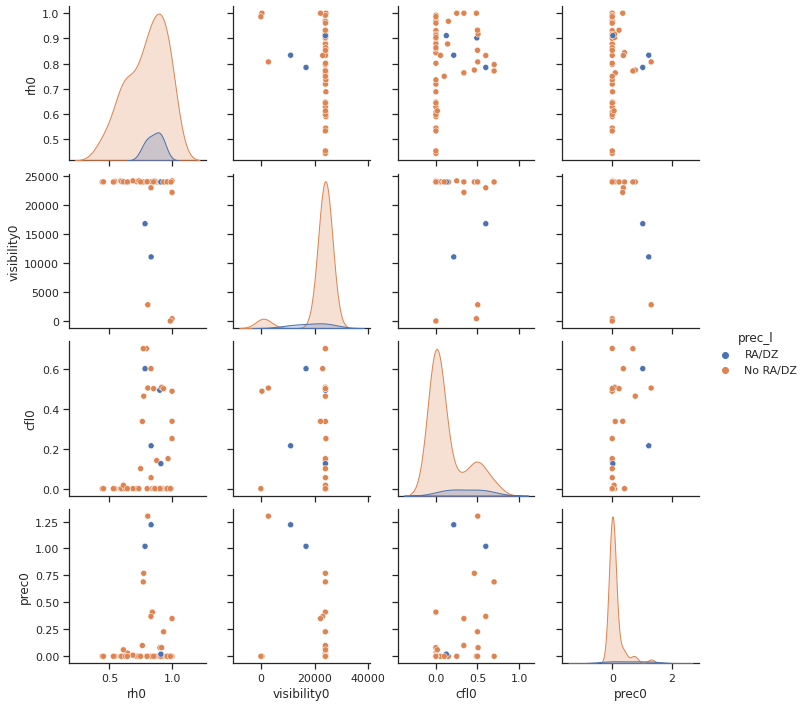

In [6]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["prec_l","rh0","visibility0","cfl0","prec0"]].sample(50), hue="prec_l");

**Scatter plot 3 PCA variables and prec_l**

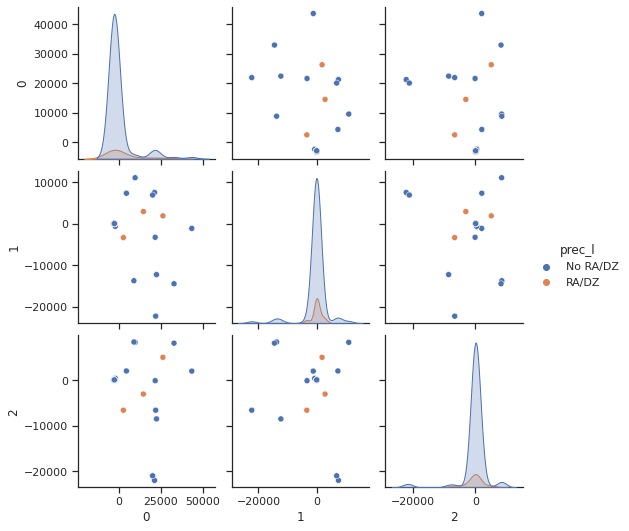

In [9]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["prec_l"] = df_all1k.prec_l
sns.pairplot(df_pca.sample(100), hue="prec_l");

**Meteorological model score Heidke Skill Score (HSS)**

In [10]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec1])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

HSS point 0
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     29142  10827  39969
RA/DZ          924   2618   3542
All          30066  13445  43511
Heidke Skill Score: 0.21

Quality report Meteorological model point 0
              precision    recall  f1-score      support
No RA/DZ       0.969268  0.729115  0.832212  39969.00000
RA/DZ          0.194719  0.739130  0.308236   3542.00000
accuracy       0.729930  0.729930  0.729930      0.72993
macro avg      0.581993  0.734123  0.570224  43511.00000
weighted avg   0.906216  0.729930  0.789558  43511.00000

HSS point 1
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     29257  10712  39969
RA/DZ          841   2701   3542
All          30098  13413  43511
Heidke Skill Score: 0.22

Quality report Meteorological model point 1
              precision    recall  f1-score       support
No RA/DZ       0.972058  0.731992  0.835115  39969.000000
RA/DZ          0.201372  0.762564  0.318608   3

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [11]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Stadistic 3729.649614856827
Reject H0,There is an association between machine learning forecast and observed values


In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:10<00:00,  2.44s/it]


In [ ]:
models

**ML LGBMClassifier**

In [12]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '


Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7484    505  7989
RA/DZ          413    301   714
All           7897    806  8703
Heidke Skill Score: 0.34

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.947702  0.936788  0.942213  7989.000000
RA/DZ          0.373449  0.421569  0.396053   714.000000
accuracy       0.894519  0.894519  0.894519     0.894519
macro avg      0.660575  0.679178  0.669133  8703.000000
weighted avg   0.900590  0.894519  0.897406  8703.000000

Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7448    545  7993
RA/DZ          393    317   710
All           7841    862  8703
Heidke Skill Score: 0.34

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.949879  0.931815  0.940760  7993.000000
RA/DZ          0.367749 

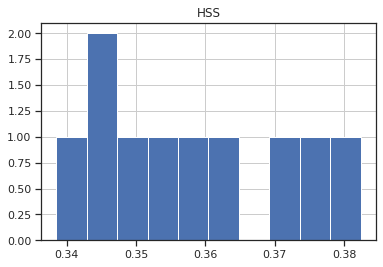

In [13]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();


**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.22) and at point 1 (0.2). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [14]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.21, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")





alpha:  0.01

HSS list from machine learning test: [0.34 0.34 0.38 0.36 0.38 0.35 0.37 0.35 0.35 0.36]

p_value point 0: 6.80843617504799e-11

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [15]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

In [ ]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

In [16]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7524    465  7989
RA/DZ          424    290   714
All           7948    755  8703
Heidke Skill Score: 0.34

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.946653  0.941795  0.944218  7989.000000
RA/DZ          0.384106  0.406162  0.394826   714.000000
accuracy       0.897851  0.897851  0.897851     0.897851
macro avg      0.665380  0.673979  0.669522  8703.000000
weighted avg   0.900501  0.897851  0.899145  8703.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7521    472  7993
RA/DZ          372    338   710
All           7893    810  8703
Heidke Skill Score: 0.39

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.952870  0.940948  0.946871  7993.000000
RA/DZ          0.417284  0

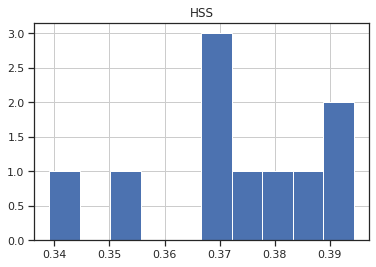

In [17]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [18]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.338 0.345 0.376 0.363 0.382 0.345 0.373 0.351 0.355 0.358]

HSS with time variables: [0.339 0.392 0.387 0.383 0.394 0.354 0.368 0.369 0.37  0.376]

alpha:  0.01

p_value point:  0.00460237418671285

we are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables

we are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs


****

**Save Machine learning model**

In [19]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LECO_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [20]:
import sklearn
print(sklearn.__version__)
print(pd.__version__)

1.2.2
1.4.4


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7525    464  7989
RA/DZ          370    344   714
All           7895    808  8703
Heidke Skill Score: 0.4

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.953135  0.941920  0.947494  7989.000000
RA/DZ          0.425743  0.481793  0.452037   714.000000
accuracy       0.904171  0.904171  0.904171     0.904171
macro avg      0.689439  0.711856  0.699766  8703.000000
weighted avg   0.909867  0.904171  0.906847  8703.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      7519    489  8008
RA/DZ          287    408   695
All           7806    897  8703
Heidke Skill Score: 0.46

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.963233  0.938936  0.950930  8008.000000
RA/DZ          0.454849  0.

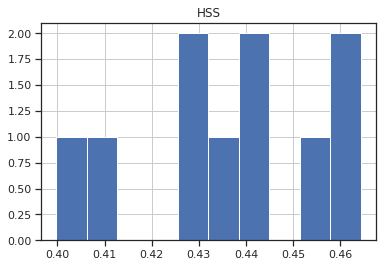

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

In [22]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")
     

dir0: 1.2%
snow_prec0: 0.0%
snowlevel0: 0.7%
mod0: 0.9%
wind_gust0: 1.1%
mslp0: 1.0%
temp0: 0.5%
rh0: 0.9%
visibility0: 0.7%
lhflx0: 0.6%
lwflx0: 0.9%
conv_prec0: 0.4%
prec0: 1.0%
swflx0: 0.6%
shflx0: 0.6%
cape0: 0.8%
cin0: 0.5%
cfh0: 0.7%
cfl0: 2.3%
cfm0: 2.9%
cft0: 2.9%
HGT5000: 1.9%
HGT8500: 1.5%
T5000: 0.7%
T8500: 0.7%
dir1: 1.1%
snow_prec1: 0.0%
snowlevel1: 0.9%
mod1: 0.7%
wind_gust1: 1.1%
mslp1: 0.8%
temp1: 0.6%
rh1: 0.7%
visibility1: 0.6%
lhflx1: 0.6%
lwflx1: 1.1%
conv_prec1: 0.5%
prec1: 1.0%
swflx1: 0.7%
shflx1: 0.6%
cape1: 0.7%
cin1: 0.5%
cfh1: 0.7%
cfl1: 1.9%
cfm1: 2.7%
cft1: 2.2%
HGT5001: 1.2%
HGT8501: 1.4%
T5001: 0.8%
T8501: 0.8%
dir2: 1.0%
snow_prec2: 0.0%
snowlevel2: 0.7%
mod2: 0.6%
wind_gust2: 1.3%
mslp2: 0.9%
temp2: 0.5%
rh2: 0.8%
visibility2: 0.6%
lhflx2: 0.5%
lwflx2: 0.8%
conv_prec2: 0.3%
prec2: 0.9%
swflx2: 0.6%
shflx2: 0.5%
cape2: 0.7%
cin2: 0.6%
cfh2: 0.7%
cfl2: 2.1%
cfm2: 2.2%
cft2: 2.1%
HGT5002: 1.8%
HGT8502: 1.3%
T5002: 0.7%
T8502: 0.9%
dir3: 0.9%
snow_prec3: 0.

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [23]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.339 0.392 0.387 0.383 0.394 0.354 0.368 0.369 0.37  0.376]

HSS with ExtraTreesClassifier: [0.4   0.464 0.431 0.458 0.441 0.432 0.441 0.453 0.432 0.411]

alpha:  0.01

p_value point:  3.5402247729125204e-07

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier
